In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/final_by_press_with_er.csv",sep=";")
df['State'] = df['State'].replace('Orrisa', 'Orissa')
df['State'] = df['State'].replace('Odisha', 'Orissa')
df.head()

,Unnamed: 0,Complainant,Against,Date,Decision,ComplaintType,ReportName,Locations,PrimaryKey,Complaint,Complainant_Aff,Against_Aff,Locations_Mapped,State,c_name_resolved,c_aff_resolved,c_location_resolved,a_name_resolved,a_aff_resolved,a_location_resolved
0,0,Shri Dinesh Singh Bhadoriya,Shri Mahavir Bhagel,15.11.2022,Upheld,Harassment of Newsmen,AnnualReport2023,"Gwalior, Madhya Pradesh",0,"Complaint of Shri Dinesh Singh Bhadoriya, Shri...",Journalists,NaN,"Gwalior, Madhya Pradesh",Madhya Pradesh,Shri Dinesh Singh Bhadoriya,Journalists,"Gwalior, Madhya Pradesh",Shri Mahavir Bhagel,NaN,"Gwalior, Madhya Pradesh"
1,1,Shri Yogendra Singh Bhadoriya,Shri Mahavir Bhagel,15.11.2022,Upheld,Harassment of Newsmen,AnnualReport2023,"Gwalior, Madhya Pradesh",0,"Complaint of Shri Dinesh Singh Bhadoriya, Shri...",Journalists,NaN,"Gwalior, Madhya Pradesh",Madhya Pradesh,Shri Yogendra Singh Bhadoriya,Journalists,"Gwalior, Madhya Pradesh",Shri Mahavir Bhagel,NaN,"Gwalior, Madhya Pradesh"
2,2,Sumer Singh Narwariya,Shri Mahavir Bhagel,15.11.2022,Upheld,Harassment of Newsmen,AnnualReport2023,"Gwalior, Madhya Pradesh",0,"Complaint of Shri Dinesh Singh Bhadoriya, Shri...",Journalists,NaN,"Gwalior, Madhya Pradesh",Madhya Pradesh,Sumer Singh Narwariya,Journalists,"Gwalior, Madhya Pradesh",Shri Mahavir Bhagel,NaN,"Gwalior, Madhya Pradesh"
3,3,Shri Yogendra Kashinath Dorkar,Dr. Rajendra Bharud,15.11.2022,Disposed of (Complainant Censured),Harassment of Newsmen,AnnualReport2023,Maharashtra,1,"Complaint of Shri Yogendra Kashinath Dorkar, E...",NaN,NaN,Maharashtra,Maharashtra,Shri Yogendra Kashinath Dorkar,NaN,Maharashtra,Dr. Rajendra Bharud,NaN,Maharashtra
4,4,Shri Jagpal Singh,Shri Praveen Kumar,28.02.2023,Disposed of (with liberty to the Complainant t...,Harassment of Newsmen,AnnualReport2023,"Gonda, UP",2,"Complaint of Shri Jagpal Singh, Correspondent,...",Correspondent UP Journalists Association,Commander Railway Protection Force,"Gonda, Uttar Pradesh",Uttar Pradesh,Shri Jagpal Singh,Correspondent UP Journalists Association,"Gonda, Uttar Pradesh",Shri Praveen Kumar,Commander Railway Protection Force,"Gonda, Uttar Pradesh"


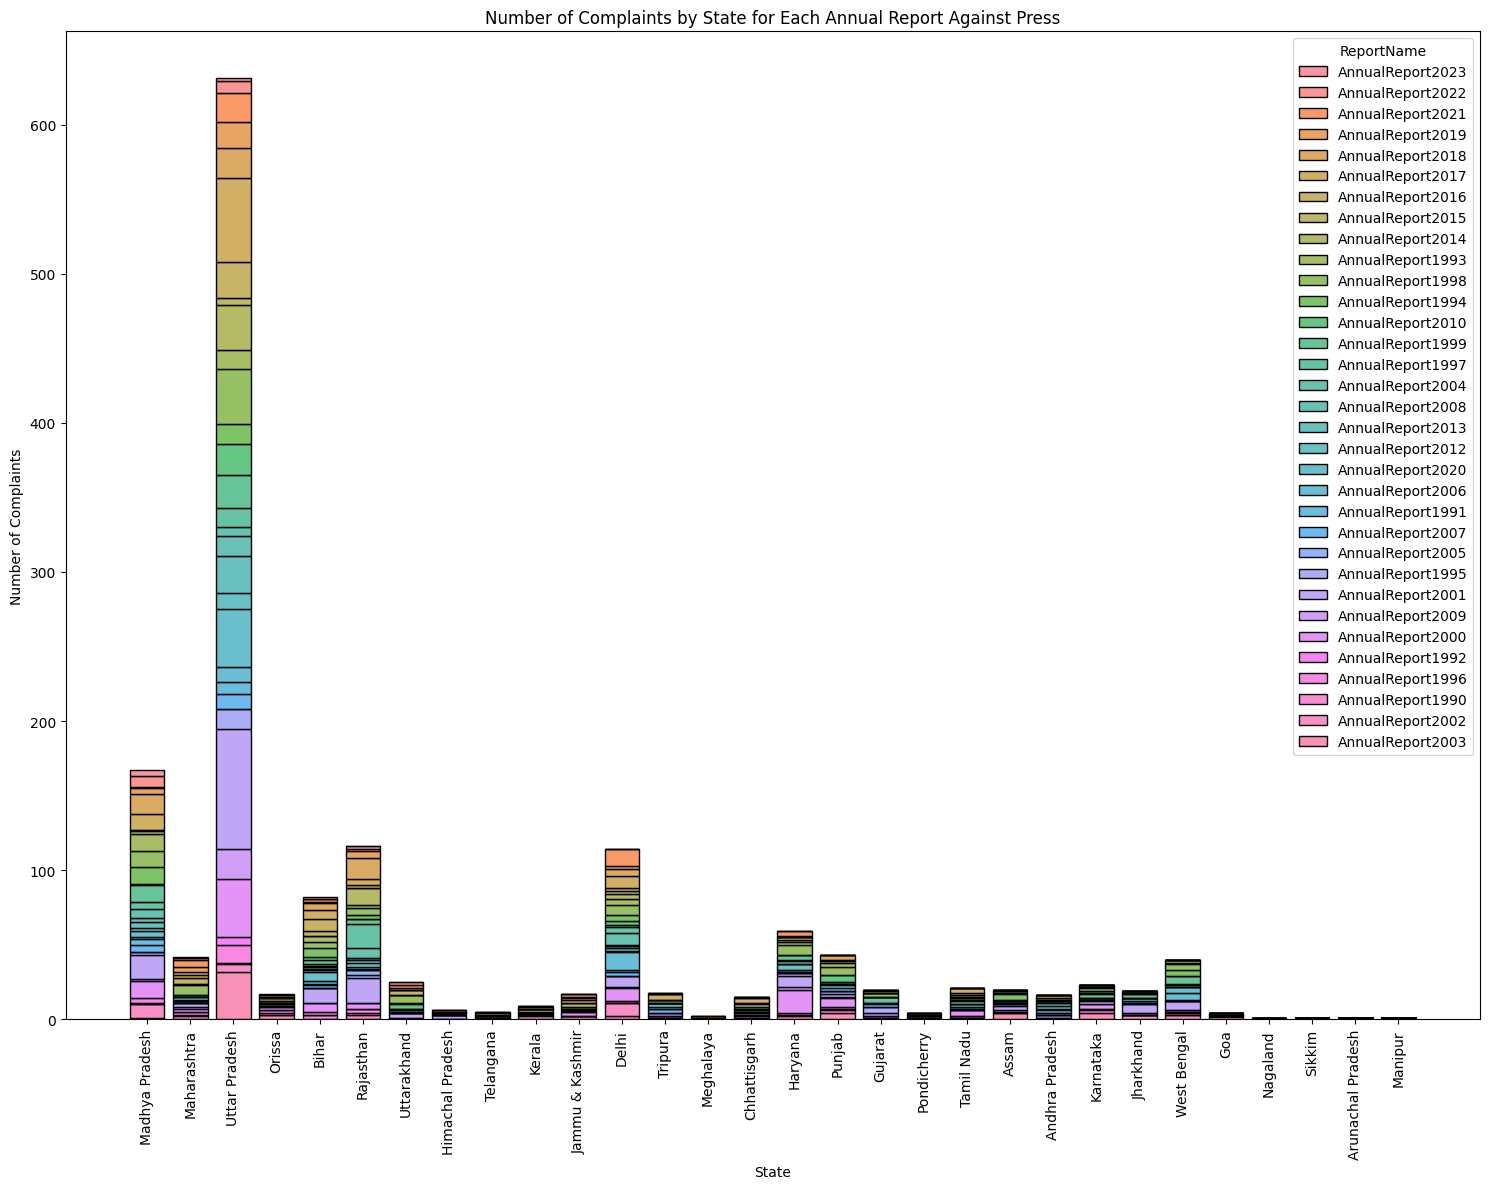

In [ ]:
plt.figure(figsize=(15, 12))
sns.histplot(data=df, x='State', hue='ReportName', multiple='stack', shrink=.8)

plt.title('Number of Complaints by State for Each Annual Report Against Press')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

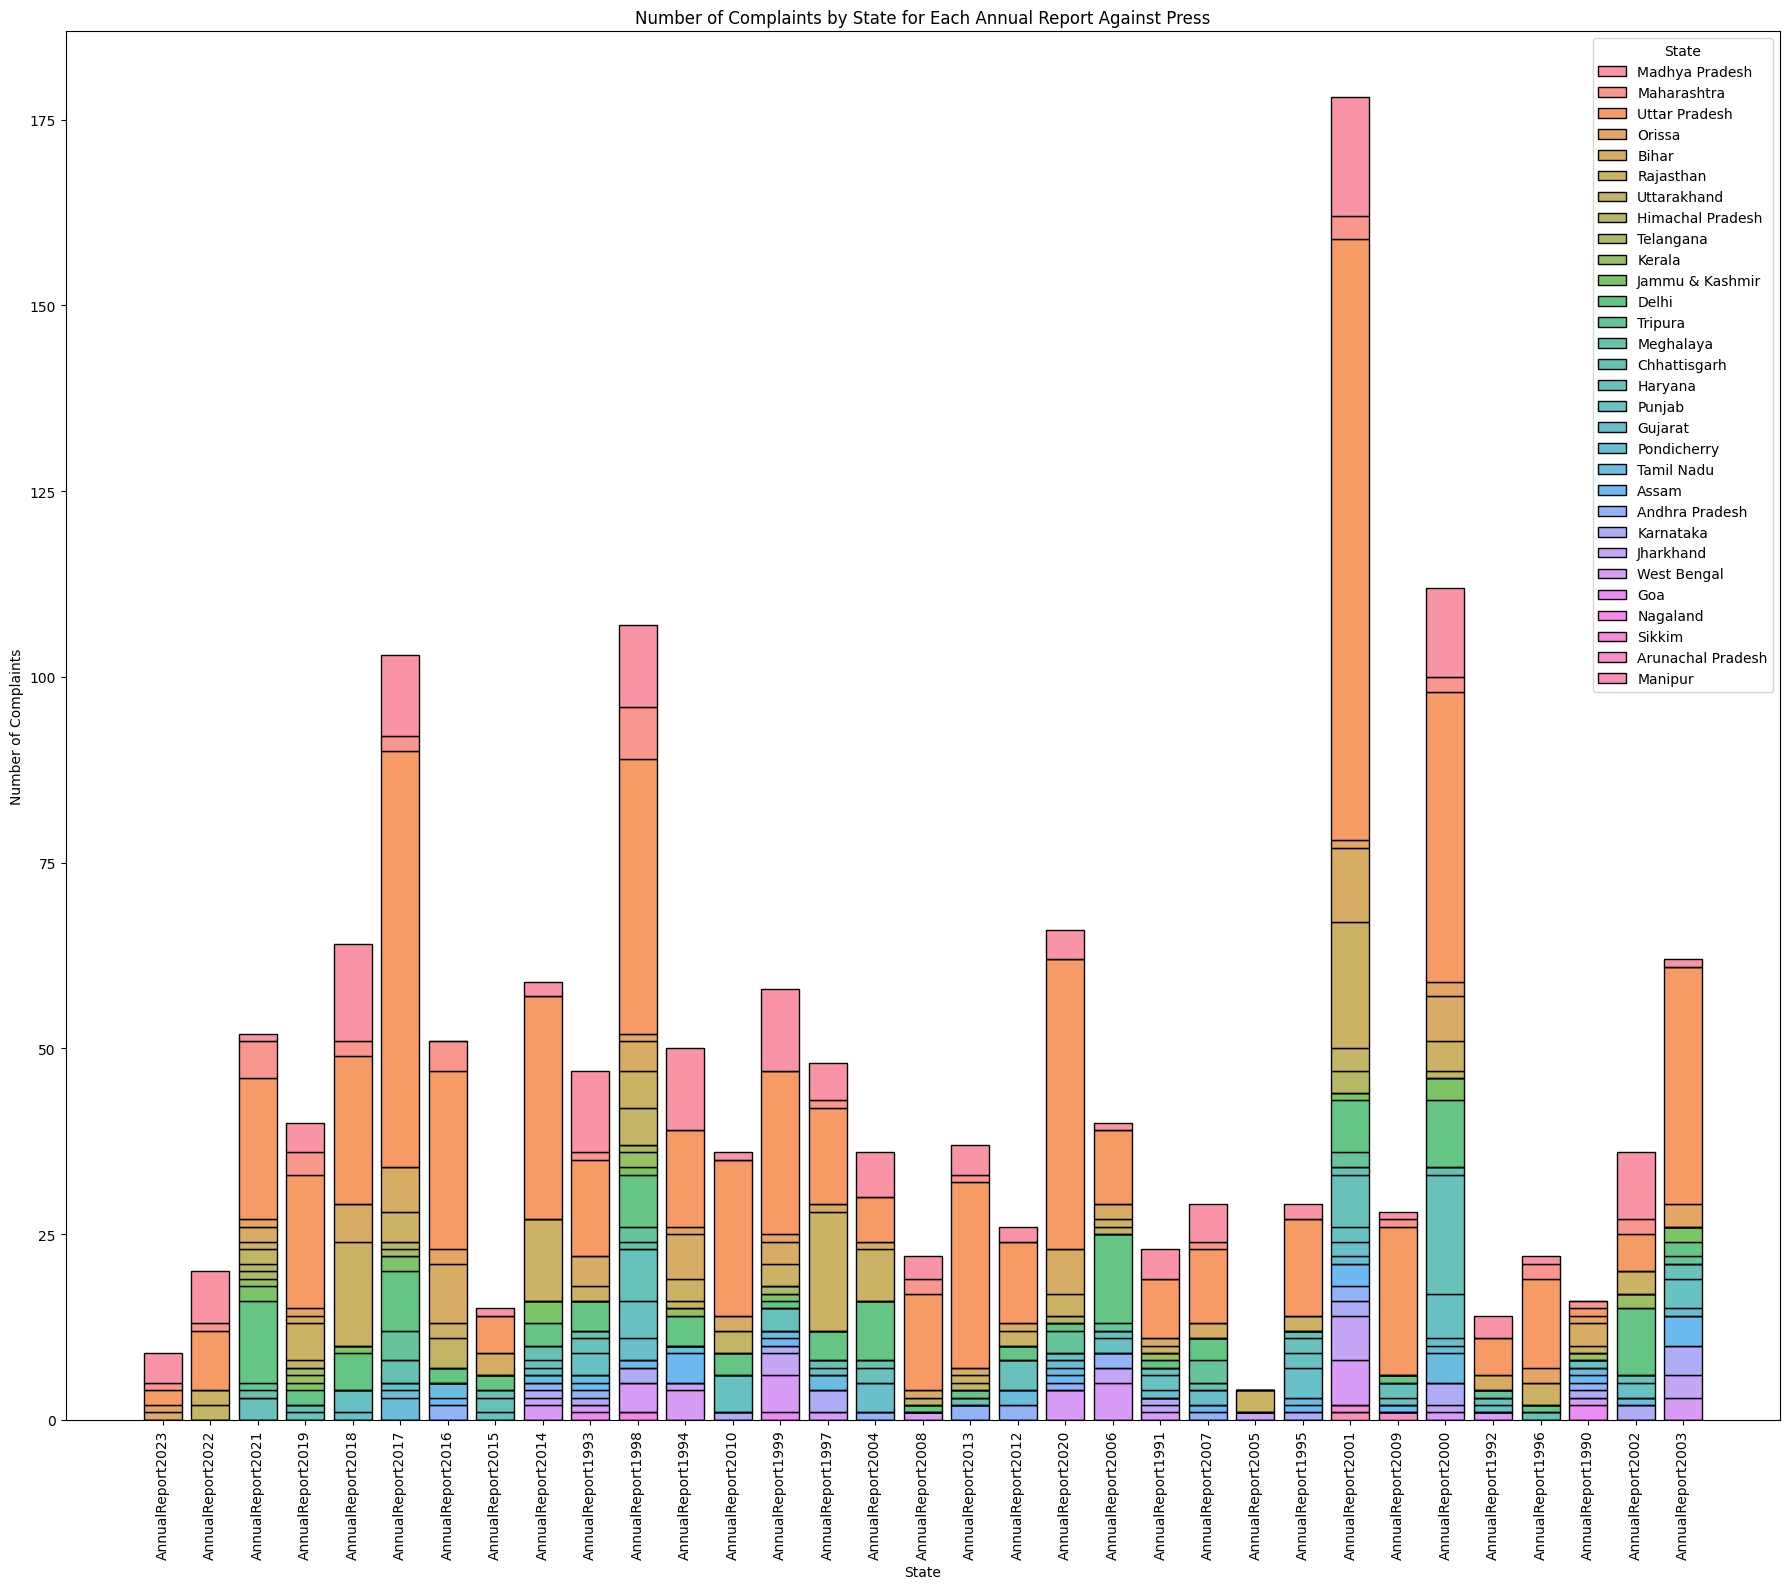

In [ ]:
plt.figure(figsize=(18, 16))
sns.histplot(data=df, x='ReportName', hue='State', multiple='stack', shrink=.8)

plt.title('Number of Complaints by State for Each Annual Report Against Press')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df['State'].unique()

array(['Madhya Pradesh', 'Maharashtra', 'Uttar Pradesh', 'Orissa',
       'Bihar', 'Rajasthan', 'Uttarakhand', 'Himachal Pradesh',
       'Telangana', 'Kerala', 'Jammu & Kashmir', 'Delhi', 'Tripura',
       'Meghalaya', 'Chhattisgarh', 'Haryana', 'Punjab', nan, 'Gujarat',
       'Pondicherry', 'Tamil Nadu', 'Assam', 'Andhra Pradesh',
       'Karnataka', 'Jharkhand', 'West Bengal', 'Goa', 'Nagaland',
       'Sikkim', 'Arunachal Pradesh', 'Manipur'], dtype=object)

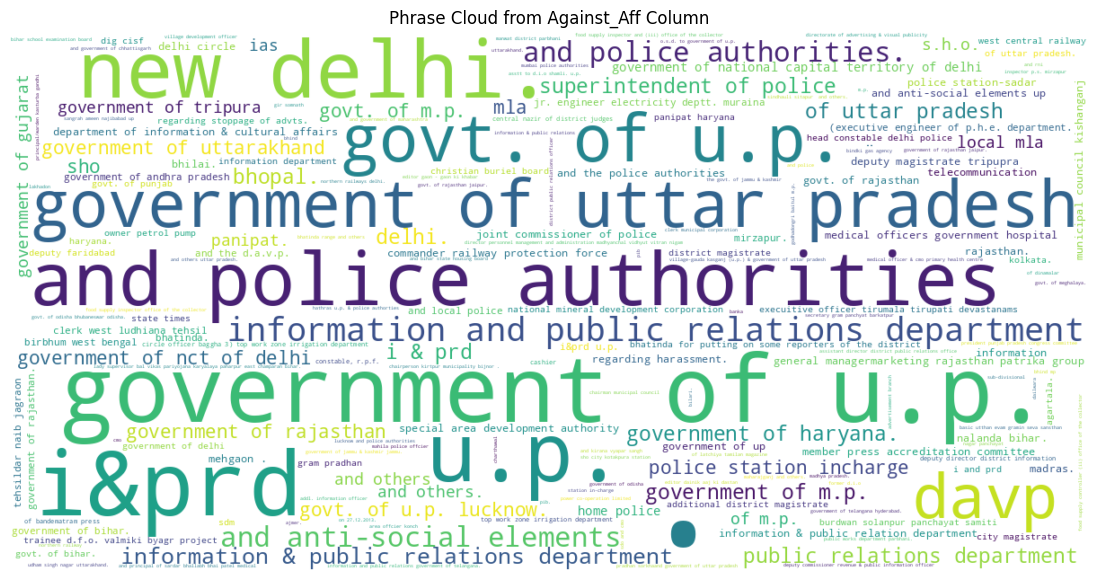

In [ ]:

import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Combine and clean all phrases
all_phrases = df['a_aff_resolved'].dropna().astype(str).str.cat(sep=';')
all_phrases = [phrase.strip().lower() for phrase in all_phrases.split(';') if phrase.strip()]

# Count phrase frequencies
phrase_freq = Counter(all_phrases)

# Generate the phrase cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(phrase_freq)

# Display the cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Phrase Cloud from Against_Aff Column")
plt.show()



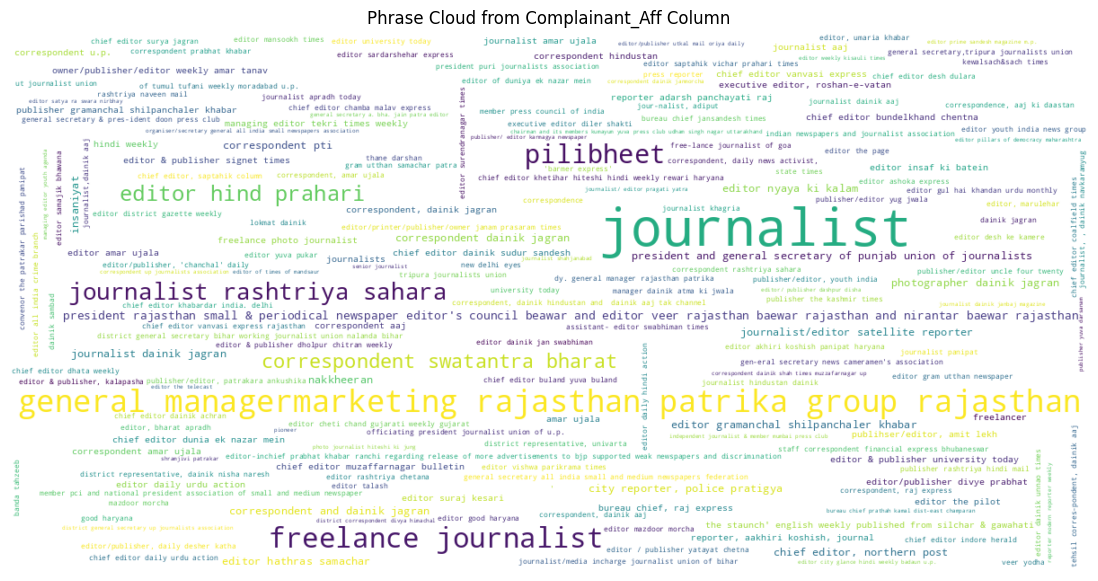

In [ ]:

import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Combine and clean all phrases
all_phrases = df['c_aff_resolved'].dropna().astype(str).str.cat(sep=';')
all_phrases = [phrase.strip().lower() for phrase in all_phrases.split(';') if phrase.strip()]

# Count phrase frequencies
phrase_freq = Counter(all_phrases)

# Generate the phrase cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(phrase_freq)

# Display the cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Phrase Cloud from Complainant_Aff Column")
plt.show()



In [ ]:
a=df['ComplaintType'].value_counts()

In [ ]:
a_dict = a.to_dict()
print(a_dict)

{'Harassment of Newsmen': 948, 'Facilities to the Press': 499, 'Facilities to the Press ': 60, 'Curtailment of Press Freedom': 38, 'Curtailment to the Press': 30, 'Voilence against Newsmen': 22, 'Suo-Motu Cognizance': 15, 'Voilence of Newsmen': 12, 'Harassment of Newsman': 10, 'Curtailment of the Press Freedom': 7, 'Curtailment ': 7, 'Curtailment': 6, 'Editor-Manager Relationship': 1}


In [ ]:
!pip install rapidfuzz
from rapidfuzz import fuzz
from rapidfuzz.distance import Levenshtein, JaroWinkler

def hybrid_strict_score(a, b):
    #score3=0.9
    if a.strip()=="" and b.strip()=="":
      return 100
    score1 = fuzz.token_set_ratio(a, b)
    score2 = JaroWinkler.similarity(a, b) * 100


    return 0.5* score1 + 0.5 * score2


In [ ]:
def merge_similar_keys(data_dict, score_threshold=70):
    merged_dict = {}
    processed_keys = set()

    for key1, value1 in data_dict.items():
        if key1 in processed_keys:
            continue

        similar_keys = [key1]
        for key2 in data_dict.keys():
            if key1 != key2 and key2 not in processed_keys:
                score = hybrid_strict_score(key1, key2)
                if score > score_threshold:
                    similar_keys.append(key2)

        # Find the longest key among similar ones
        longest_key = max(similar_keys, key=len)

        # Sum the values of similar keys
        merged_value = sum(data_dict[key] for key in similar_keys)

        # Add to the merged dictionary
        merged_dict[longest_key] = merged_value

        # Mark similar keys as processed
        processed_keys.update(similar_keys)

    return merged_dict

merged_complaint_types = merge_similar_keys(a_dict)
print(merged_complaint_types)

{'Harassment of Newsmen': 958, 'Facilities to the Press ': 589, 'Curtailment of the Press Freedom': 58, 'Voilence against Newsmen': 34, 'Suo-Motu Cognizance': 15, 'Editor-Manager Relationship': 1}


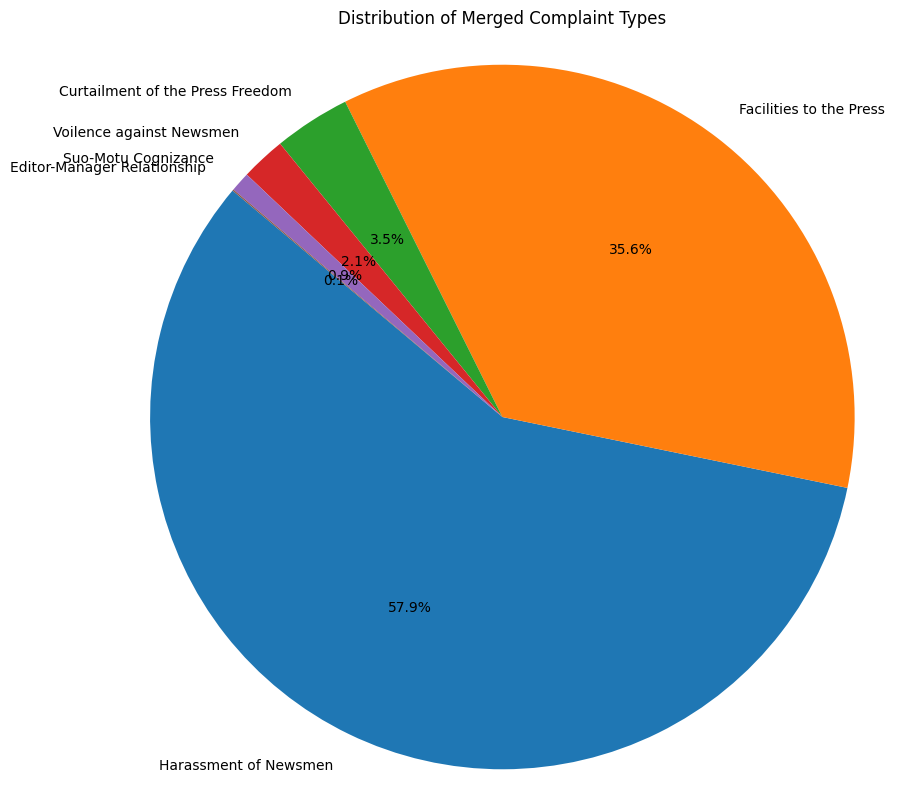

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(merged_complaint_types.values(), labels=merged_complaint_types.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Merged Complaint Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Fill None values in 'ComplaintType' with the previous non-None value
df['ComplaintType'].fillna(method='ffill', inplace=True)

# Create a new column 'res_ComplaintType' and initialize it
df['res_ComplaintType'] = None

for index, row in df.iterrows():
    # Calculate similarity scores with merged complaint types
    scores = {}
    for key in merged_complaint_types.keys():
        # Add a check for empty strings before calculating the score
        if isinstance(row["ComplaintType"], str) and isinstance(key, str) and row["ComplaintType"].strip() != "":
            scores[key] = hybrid_strict_score(row["ComplaintType"], key)
        else:
            scores[key] = 0 # Assign a score of 0 if ComplaintType is not a valid string

    # Find the key with the maximum score
    if scores:  # Check if scores dictionary is not empty
      max_key = max(scores, key=scores.get)
      # Assign the key with the maximum score to 'res_ComplaintType'
      df.loc[index, 'res_ComplaintType'] = max_key
    else:
      df.loc[index, 'res_ComplaintType'] = None # Assign None if no scores were calculated

# Optional: Display the updated DataFrame with the new column
# display(df[['ComplaintType', 'res_ComplaintType']].head())

/tmp/ipython-input-1371937273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ComplaintType'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-1371937273.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ComplaintType'].fillna(method='ffill', inplace=True)


In [ ]:
df.head()

,Unnamed: 0,Complainant,Against,Date,Decision,ComplaintType,ReportName,Locations,PrimaryKey,Complaint,...,Against_Aff,Locations_Mapped,State,c_name_resolved,c_aff_resolved,c_location_resolved,a_name_resolved,a_aff_resolved,a_location_resolved,res_ComplaintType
0,0,Shri Dinesh Singh Bhadoriya,Shri Mahavir Bhagel,15.11.2022,Upheld,Harassment of Newsmen,AnnualReport2023,"Gwalior, Madhya Pradesh",0,"Complaint of Shri Dinesh Singh Bhadoriya, Shri...",...,NaN,"Gwalior, Madhya Pradesh",Madhya Pradesh,Shri Dinesh Singh Bhadoriya,Journalists,"Gwalior, Madhya Pradesh",Shri Mahavir Bhagel,NaN,"Gwalior, Madhya Pradesh",Harassment of Newsmen
1,1,Shri Yogendra Singh Bhadoriya,Shri Mahavir Bhagel,15.11.2022,Upheld,Harassment of Newsmen,AnnualReport2023,"Gwalior, Madhya Pradesh",0,"Complaint of Shri Dinesh Singh Bhadoriya, Shri...",...,NaN,"Gwalior, Madhya Pradesh",Madhya Pradesh,Shri Yogendra Singh Bhadoriya,Journalists,"Gwalior, Madhya Pradesh",Shri Mahavir Bhagel,NaN,"Gwalior, Madhya Pradesh",Harassment of Newsmen
2,2,Sumer Singh Narwariya,Shri Mahavir Bhagel,15.11.2022,Upheld,Harassment of Newsmen,AnnualReport2023,"Gwalior, Madhya Pradesh",0,"Complaint of Shri Dinesh Singh Bhadoriya, Shri...",...,NaN,"Gwalior, Madhya Pradesh",Madhya Pradesh,Sumer Singh Narwariya,Journalists,"Gwalior, Madhya Pradesh",Shri Mahavir Bhagel,NaN,"Gwalior, Madhya Pradesh",Harassment of Newsmen
3,3,Shri Yogendra Kashinath Dorkar,Dr. Rajendra Bharud,15.11.2022,Disposed of (Complainant Censured),Harassment of Newsmen,AnnualReport2023,Maharashtra,1,"Complaint of Shri Yogendra Kashinath Dorkar, E...",...,NaN,Maharashtra,Maharashtra,Shri Yogendra Kashinath Dorkar,NaN,Maharashtra,Dr. Rajendra Bharud,NaN,Maharashtra,Harassment of Newsmen
4,4,Shri Jagpal Singh,Shri Praveen Kumar,28.02.2023,Disposed of (with liberty to the Complainant t...,Harassment of Newsmen,AnnualReport2023,"Gonda, UP",2,"Complaint of Shri Jagpal Singh, Correspondent,...",...,Commander Railway Protection Force,"Gonda, Uttar Pradesh",Uttar Pradesh,Shri Jagpal Singh,Correspondent UP Journalists Association,"Gonda, Uttar Pradesh",Shri Praveen Kumar,Commander Railway Protection Force,"Gonda, Uttar Pradesh",Harassment of Newsmen


In [ ]:
df['res_ComplaintType'].value_counts()

,count
res_ComplaintType,
Harassment of Newsmen,958
Facilities to the Press,559
Curtailment of the Press Freedom,88
Voilence against Newsmen,34
Suo-Motu Cognizance,15
Editor-Manager Relationship,1


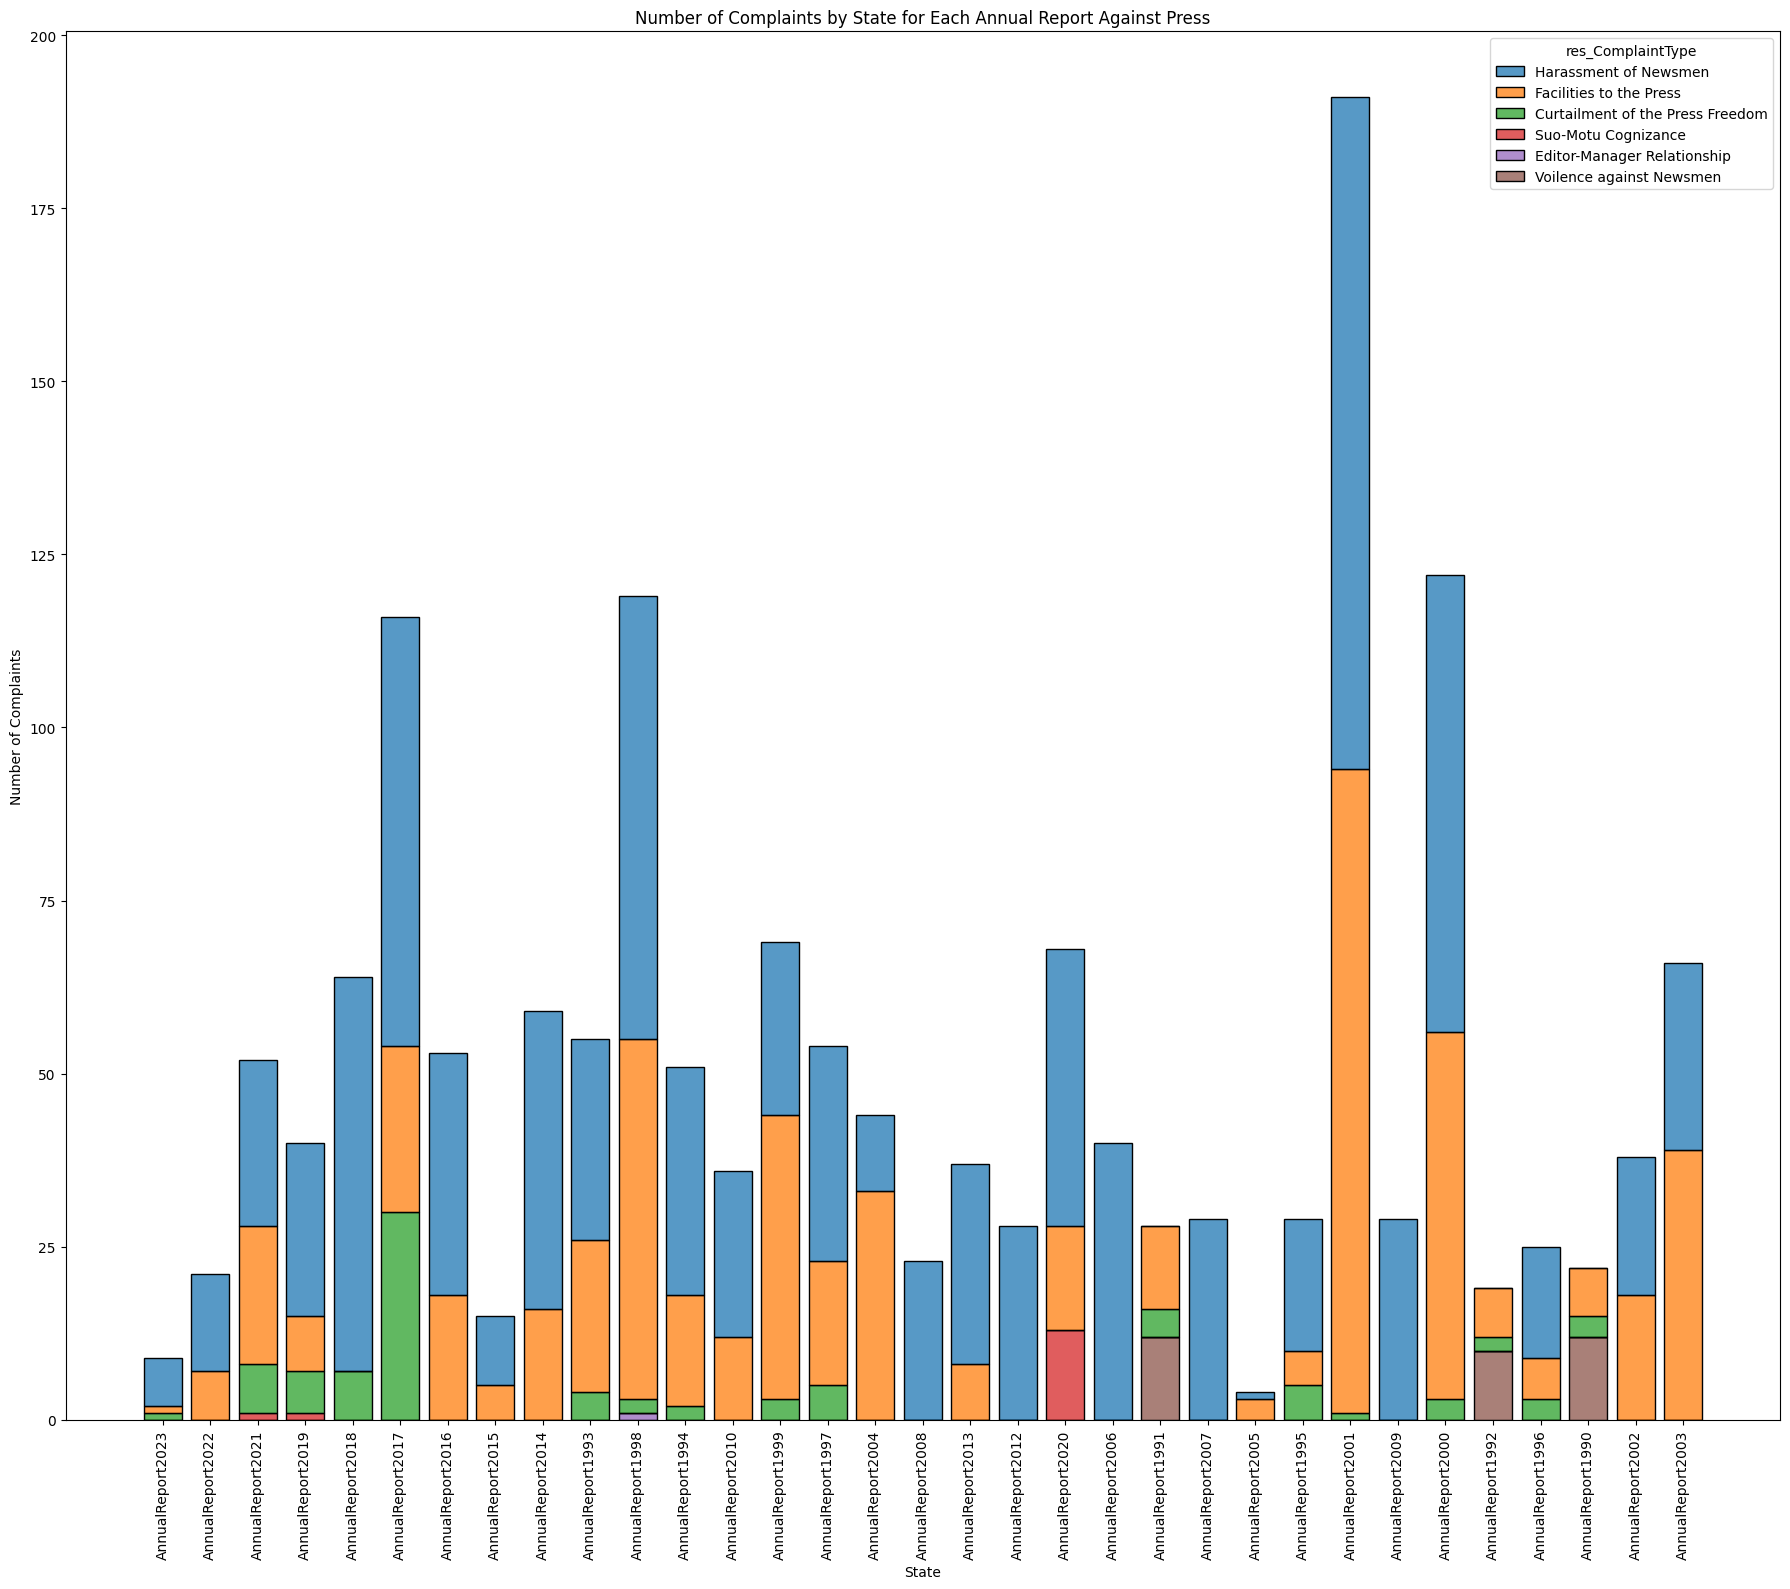

In [ ]:
plt.figure(figsize=(18, 16))
sns.histplot(data=df, x='ReportName', hue='res_ComplaintType', multiple='stack', shrink=.8)

plt.title('Number of Complaints by State for Each Annual Report Against Press')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
!pip install neo4j
uri = "neo4j+s://3cc5f60f.databases.neo4j.io"
user = "neo4j"
password = "67q8-sCE4iRc_YyvPnwCsflDvtBRZY-AGncDrssAPac"


In [ ]:
from neo4j import GraphDatabase

driver = GraphDatabase.driver(uri, auth=(user, password))

def get_directed_graph_properties(tx):
    result = tx.run("""
        CALL {
            MATCH (n)
            RETURN count(n) AS node_count
        }
        CALL {
            MATCH ()-[r]->()
            RETURN count(r) AS rel_count
        }
        CALL {
            MATCH (n)<-[r]-()
            WITH n, count(r) AS in_degree
            ORDER BY in_degree DESC
            LIMIT 1
            RETURN in_degree AS max_in_degree
        }
        CALL {
            MATCH (n)-[r]->()
            WITH n, count(r) AS out_degree
            ORDER BY out_degree DESC
            LIMIT 1
            RETURN out_degree AS max_out_degree
        }
        RETURN
            node_count,
            rel_count,
            rel_count * 1.0 / node_count AS avg_out_degree,
            rel_count * 1.0 / node_count AS avg_in_degree,
            max_in_degree,
            max_out_degree,
            rel_count * 1.0 / (node_count * (node_count - 1)) AS density
        LIMIT 1
    """)
    return result.single()

with driver.session() as session:
    props = session.read_transaction(get_directed_graph_properties)

    print("Directed Graph Properties:")
    print(f"  Nodes            : {props['node_count']}")
    print(f"  Relationships    : {props['rel_count']}")
    print(f"  Avg In-Degree    : {props['avg_in_degree']:.2f}")
    print(f"  Avg Out-Degree   : {props['avg_out_degree']:.2f}")
    print(f"  Max In-Degree    : {props['max_in_degree']}")
    print(f"  Max Out-Degree   : {props['max_out_degree']}")
    print(f"  Density          : {props['density']:.6f}")

driver.close()

/tmp/ipython-input-2016013626.py:42: DeprecationWarning: read_transaction has been renamed to execute_read
  props = session.read_transaction(get_directed_graph_properties)


Directed Graph Properties:
  Nodes            : 2846
  Relationships    : 1643
  Avg In-Degree    : 0.58
  Avg Out-Degree   : 0.58
  Max In-Degree    : 30
  Max Out-Degree   : 11
  Density          : 0.000203


In [ ]:
a=df['State'].value_counts().to_frame()
a.index = a.index.str.replace('Uttarakhand', 'Uttaranchal')
a.index = a.index.str.replace('Jammu & Kashmir', 'Jammu and Kashmir')
a.head(30)

,count
State,
Uttar Pradesh,631
Madhya Pradesh,167
Rajasthan,116
Delhi,114
Bihar,82
Haryana,59
Punjab,43
Maharashtra,42
West Bengal,40


In [ ]:
india['NAME_1']

,NAME_1
0,Andaman and Nicobar
1,Telangana
2,Andhra Pradesh
3,Arunachal Pradesh
4,Assam
5,Bihar
6,Chandigarh
7,Chhattisgarh
8,Dadra and Nagar Haveli
9,Daman and Diu


In [ ]:
!pip install rapidfuzz geopandas
!pip install mapclassify


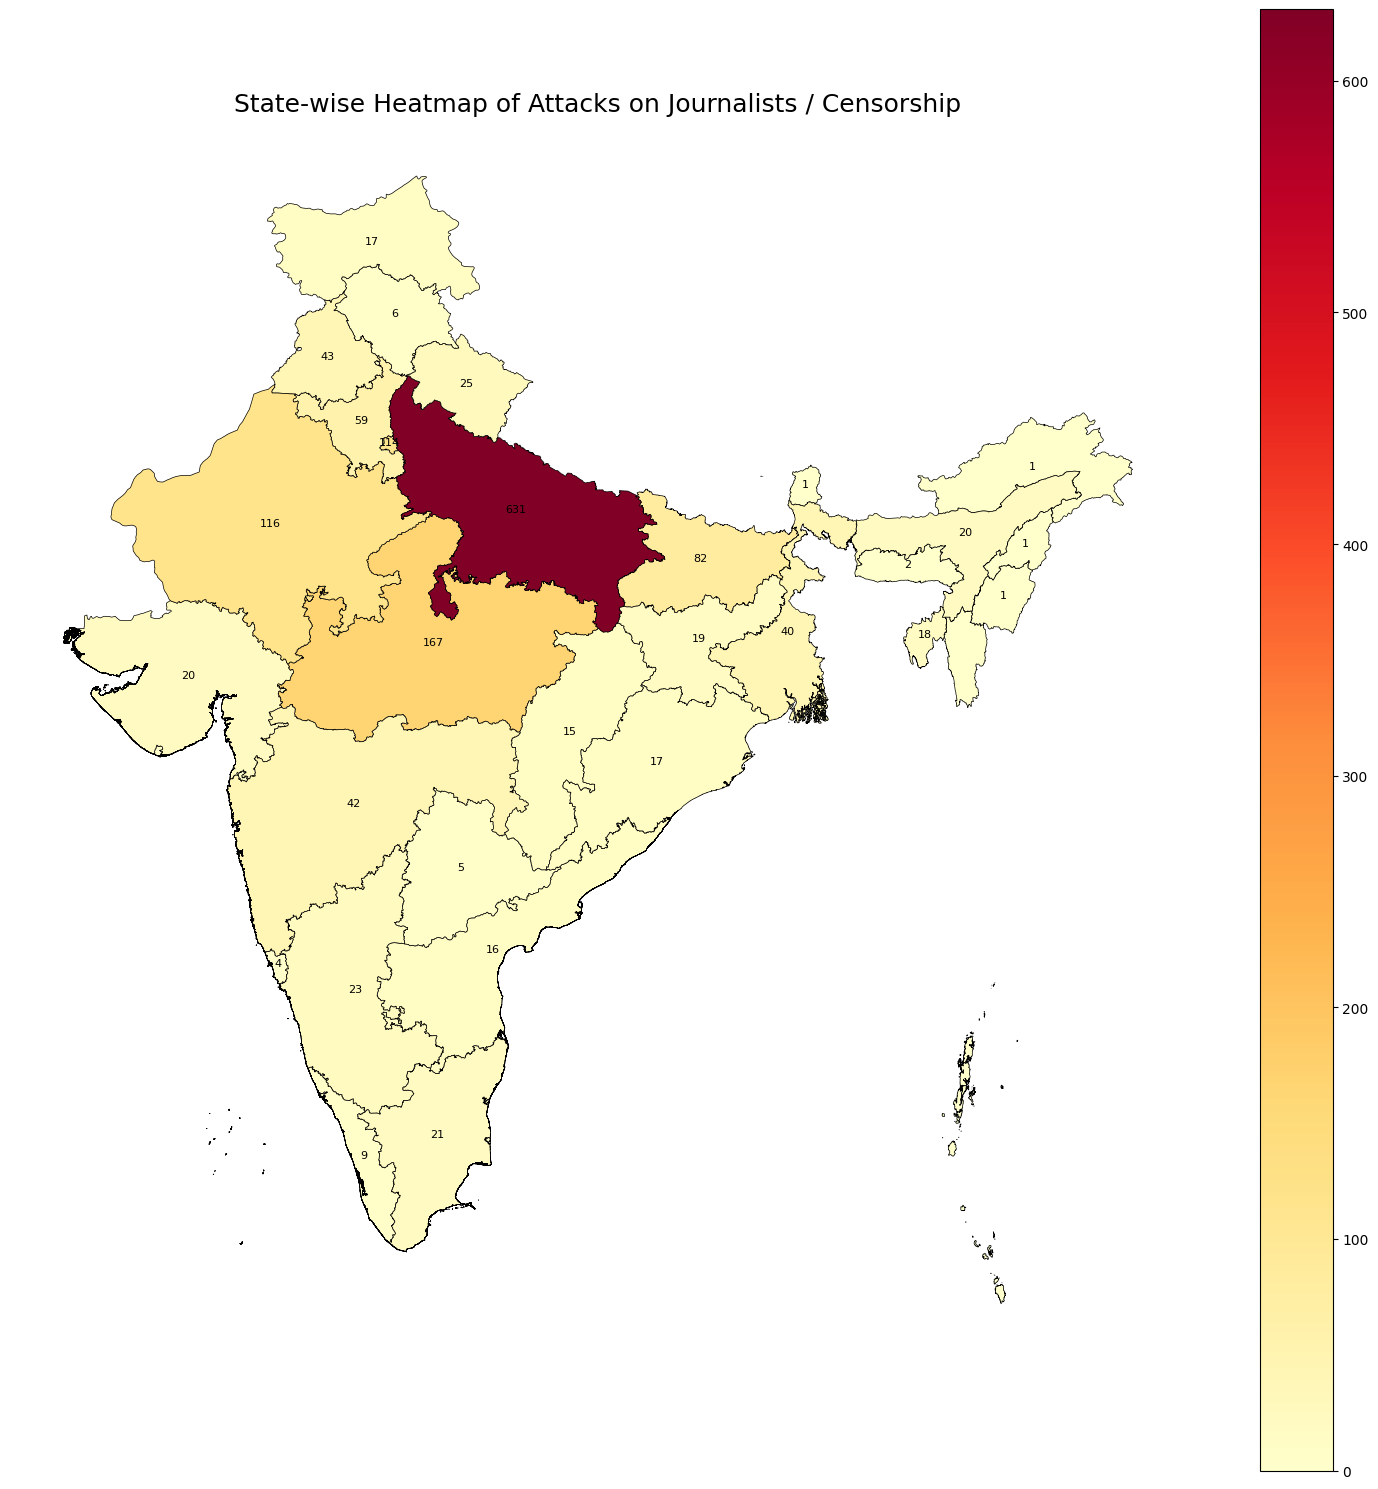

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz
import mapclassify # Import mapclassify after installing it


# === Load India GeoJSON ===
india = gpd.read_file("https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson")

# === Fuzzy Match Function ===
india_states = india['NAME_1'].tolist()

def match_state(state_name, choices, threshold=90):
    match, score, _ = process.extractOne(state_name, choices, scorer=fuzz.token_sort_ratio)
    return match if score >= threshold else None

# Use a.index to access the state names for matching
a['MatchedState'] = a.index.to_series().apply(lambda x: match_state(x, india_states))
a_matched = a.dropna(subset=['MatchedState'])

# === Merge GeoJSON with your data ===
merged = india.merge(a_matched, left_on='NAME_1', right_on='MatchedState', how='left')
merged['count'] = merged['count'].fillna(0)

# === Define color bins (gap = 50) ===
max_val = merged['count'].max()
bins = list(range(0, int(max_val) + 51, 50))  # e.g., [0, 50, 100, 150, ...]

# === Plot with custom bins ===
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged.plot(
    column='count',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    edgecolor='black',
    linewidth=0.5,
    # Removed scheme and classification_kwds as we can handle bins with matplotlib
)

# === Add counts at centroids ===
for idx, row in merged.iterrows():
    if row['count'] > 0:
        plt.annotate(
            text=f"{int(row['count'])}",
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            ha='center',
            fontsize=8,
            color='black'
        )

plt.title("State-wise Heatmap of Attacks on Journalists / Censorship", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
india

In [ ]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 13.6 MB/s eta 0:00:00
